# <font color ='red'>QF627 2022 G1 Group 6 Contribution Statement</font>

> ### * Miti Nopnirapath 
> ##### Mr Tech Lead. Developed backtesting & visualization toolkits, contributed to Data Pool, performed PCA analysis on input features, hyperparameter tuning and model validation for finalized alpha generation. 

> ### * Stephen Kusrianto
> ##### Project Manager, point person for communication within team members and consolidated code + executive summary. Worked on Momentum Trading Strategy and wrote its description.

> ### * Ting Luo
> ##### Worked on Mean-Reversion Strategy. Brainstormed alpha generation ideas for Mean-Reversion and Momentum Trading.

> ### * Wenyan Liu
> ##### Worked on Machine Learning Strategy. Built the code framework (i.e. Y, X input features), performed initial EDA and input features wrangling. Prototyped SVC model.

> ### * Zhang Yi
> ##### Worked on Machine Learning Strategy and wrote its description. Contributed to Data Pool and backtested initial market outperformance on chosen Machine Learning Model.

> ### * Zichong Wu
> ##### Worked on Mean-Reversion Strategy and wrote its description. Developed proprietary code to backtest mean-reversion specific strategies in a more efficient manner. 

# <font color = 'red'>Executive Summary</font>

#### Seeking Alpha is the ultimate quest of everyone working in the Quant Industry. We would like to acknowledge that this assignment is an exercise in modelling trading strategies in historical, 100% in-sample dataset. 

#### Whilst the idea might seem odd at first (what with our colleagues considering this as "a game of overfitting"), we understood and appreciate that the intention is for us to be able to  `execute the strategies we had in mind, exactly how we envisioned it`. With this in mind, we would like to introduce you to our three trading strategies:

#### `Ultrafittus Maximus` is a Machine Learning Strategy dedicated to break the boundaries and preconceptions on what is possible. Here, we did not adhere to realistic trading constraints (i.e. inefficient market) and strive to achieve the highest alpha possible with a selection of models.

#### `Day-Traderoo` is a Mean-Reversion Strategy designed with Intraweek trading in mind. We seek to achieve a fast, aggressive strategy that works in bullish market scenarios.

#### `STORMAC` Momentum Strategy utilizes RSI, Stochastic Oscillator and MACD technical indicators to achieve a robust, prudent trading signals that yields respectable alpha whilst requiring very little rebalancing effort.

### `Analysis and Recommendations`

#### `Ultrafittus Maximus`  
#### With Zero Drawdown and 3.2*e^21 absolute returns, it is abundantly clear that KNN & ETC Machine Learning Model outperforms all other strategies. ML modelling for trading strategies is a vast, largely untapped space in the retail investor space that allows us to generate alpha for time to come. <font color = 'red'>However</font>, it is not without its caveats; One must exert caution in observing its performance, and must err on the side of caution. While it is true that it generates unbeatable signals, KNN and ETC is known to overfit in-sample datasets compared to MLP. Our recommendation is to scale the trading size, and ensure that we are very prudent in choosing the target variable (i.e. SPY in this case) and the right Model for out-of-sample testing.

#### `Day-Traderoo` 
#### This is a strategy that we would recommend for anyone looking to automate their trades in bullish market scenarios. its fast execution might be susceptible to chunky trading fees, but our experience in backtesting seem to suggest that there is some truth in intraweek mean-reversion. From a realistic observation, retail traders do tend to base their execution judgments based on the concept that there is a value at which market will revert to, and we seek to capitalize on such notion. Our suggestion is to utilize this strategy and consider a more robust nominator/denominator that is out of scope of this assignment (e.g. VWAP instead of either Open or Close prices)

#### `STORMAC`
#### Despite its position here as the last (and the least in terms of return), we make the argument that this strategy is the most realistic of all three strategies. Technical Indicators exists to serve risk-averse investors in ensuring that we are able to wade through volatile periods safely, and we hope to seek reliable returns in real life. This strategy is not robust to financial shocks, but it is robust to the general market movement. As such, our recommendation is to consider this strategy combined with other momentum indicators (e.g. Parabolic SAR, TSI and Average True Range) to maximise the sharpe ratio through risk minimization.



# <font color='red'>Group 6 Model Performances At a Glance</font>

In [1]:
df

NameError: name 'df' is not defined

# <font color = 'red'> Bookmarks! </font>

# [Data Pool (Feature Engineering & Strategy Formulation)](#FP)

# [Backtesting & Visualization Toolkits](#BT)

# [Ultrafittus Maximus Machine Learning Strategy](#ML)

# [Day-Traderoo Mean Reversion Strategy](#MRS)

# [STORMAC Momentum Strategy](#MOM)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

# <a id='FP'>Data Pool (Feature Engineering & Strategy Formulation)</a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_datareader.data as pdr

start = pd.Timestamp(2003, 11, 1)
end = pd.Timestamp(2022, 10, 31)

def make_oil_data(start, end):
    """
    get oil future price as well as pct_change data
    """
    oil = pdr.get_data_yahoo("CL=F", start, end)['Adj Close']
    oil_diff = pd.concat([oil.pct_change(i) for i in range(1,5)], axis=1)
    oil_df = pd.concat([oil, oil_diff], axis=1)
    oil_df.columns = ['oil'] + ['oil_pct_' + str(i) for i in range(1,5)]
    return oil_df

def make_open_close_mean_reversion(start, end):
    """
    open divided by close
    """
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')
    lag_no = 10
    lagged_open = pd.concat([SPETF['Open'].shift(i) for i in range(lag_no)], axis=1)
    out_df = (lagged_open / SPETF['Close'].values[:,np.newaxis]) - 1
    out_df.columns = ['open_'+str(i)+'_div_close' for i in range(lag_no)]
    return out_df

def make_gold_data(start, end):
    """
    get gold future price as well as pct_change data
    """
    data = pdr.get_data_yahoo("GC=F", start, end)['Adj Close']
    data_diff = pd.concat([data.pct_change(i) for i in range(1,5)], axis=1)
    data_df = pd.concat([data, data_diff], axis=1)
    data_df.columns = ['gold'] + ['gold_pct_' + str(i) for i in range(1,5)]
    return data_df

def make_currency_data(start, end):
    """
    get usd/yen and usd/gbp and it's log diff
    """
    currency_ticker = ["DEXJPUS", "DEXUSUK"]
    currency_data = pdr.DataReader(currency_ticker, "fred", start=start, end=end, )
    currency_data = np.log(currency_data)
    currency_data.columns = 'LOG_' + currency_data.columns
    diffed_data_list = []
    for i in range(1,5):
        diffed = currency_data.diff(i)
        diffed.columns = diffed.columns + '_DIFF_' + str(i)
        diffed_data_list.append(diffed)
    diffed_data_df = pd.concat(diffed_data_list, axis=1)
    return pd.concat([currency_data, diffed_data_df], axis=1)

def make_bond_data(start, end):
    """
    5, 10, and 30 year bond and yoy change
    """
    bond_list = ['^FVX', '^TNX', '^TYX']
    bond_price = pdr.get_data_yahoo(bond_list, start, end)['Adj Close']
    bond_yoy = np.log(bond_price).diff(252)
    bond_yoy.columns = bond_yoy.columns + '_log_yoy'

    return pd.concat([bond_price, bond_yoy], axis=1)

def make_vix(start, end):
    """
    vix, and current vix minus rolling max vix from 252, 60, and 25 days 
    """
    vix = pdr.DataReader('VIXCLS', 'fred', start, end).ffill()
    vix_rolling_max = pd.concat([vix.rolling(252).max(), vix.rolling(60).max(), vix.rolling(25).max()], axis=1)
    vix_dd = (vix - vix_rolling_max) / vix_rolling_max
    vix_dd.columns = ['VIX_DD_Y', 'VIX_DD_Q', 'VIX_DD_M']
    return pd.concat([vix, vix_dd], axis=1)

def SMA_Minus_AdjClose(start, end):
    """
    from zichong
    """
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')
    roll = 10
    sma = pd.concat([SPETF['Adj Close'].rolling(3 * i).mean() for i in range(1, roll)], axis=1)
    out_df = sma - SPETF['Adj Close'].values[:,np.newaxis]
    out_df.columns = ['sma'+str(3 * i)+'_minus_close' for i in range(1, roll)]
    return out_df

def make_RSI(start, end):
    """
    Make rsi of 28, 14, and 7 days
    """
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')['Adj Close']
    
    def rsi(series, period):
        delta = series.diff().dropna()
        u = delta * 0
        d = u.copy()

        u[delta > 0] = delta[delta > 0]
        d[delta < 0] = -delta[delta < 0]

        u[u.index[period - 1]] = np.mean( u[:period] )  

        u = u.drop(u.index[:(period - 1)
                          ]
                  )

        d[d.index[period - 1]] = np.mean( d[:period] )

        d = d.drop(d.index[:(period - 1)
                          ]
                  )

        rs = u.ewm(com = period - 1, adjust = False).mean() / \
             d.ewm(com = period - 1, adjust = False).mean()

        rsi = 100 - 100 / (1 + rs)
        rsi.name = 'RSI_' + str(period)
        return rsi
    
    return pd.concat([rsi(SPETF, i) for i in [28, 14, 7]], axis=1)

def make_stoch(start, end, param_list = [10,25,60]):

    """
    Make stochastic oscillator
    """
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')['Adj Close']
    
    def stoch_osc(data, window):
        stoch = data.rolling(window).apply(lambda x: (x.iloc[-1] - x.min()) / (x.max() - x.min()))
        stoch.name = 'stoch_osc_' + str(window)
        return stoch

    param_list = param_list
    stoch_data = pd.concat([stoch_osc(SPETF, i) for i in param_list], axis=1)
    return stoch_data


def make_macd(start, end):
    """
    Make macd
    """
    def calculate_macd(data_series, fast, slow, signal, plot=True): 

        macd_fast = data_series.ewm(span=fast).mean()
        macd_slow = data_series.ewm(span=slow).mean()
        macd = macd_fast - macd_slow
        macd_signal = (macd).ewm(span=signal).mean()

        #cut off anything before 2015
        macd_signal = macd_signal.loc[:]
        macd = macd.loc[:]

        macd.name = 'MACD'
        macd_signal.name = 'MACD Signal'

        macd_diff = macd - macd_signal
        macd_diff.name = 'MACD Diff'

        macd_df = pd.concat([macd, macd_signal, macd_diff], axis=1).loc[:]
        if plot:
            macd_df.plot(figsize=(16,10))

        return macd_df
    
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')['Adj Close']
    
    return calculate_macd(SPETF, 9, 12, 26, False)

def make_kdj(start = '2003-11-01', end = '2022-10-31', n = 10):

    """
    Make KDJ Oscillator - From Stephen
    """
    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')
    close = SPETF['Close']
    low = SPETF['Low']
    high= SPETF['High']
    
    def STOK(close, low, high, n):
        STOK = ((close - low.rolling(n).min()) / \
                (high.rolling(n).max() - low.rolling(n).min()
                )
               ) * 100
        STOK.name = 'K%' + str(n)
        return STOK

    def STOD(close, low, high, n):
        STOK = ((close - low.rolling(n).min()) / \
                (high.rolling(n).max() - low.rolling(n).min()
                )
               ) * 100

        STOD = STOK.rolling(3).mean()
        STOD.name = 'D%' + str(n)
        return STOD
    
    def STOJ(vSTOK,vSTOD,n):
        STOJ = vSTOK.dropna() - vSTOD.dropna()
        STOJ.name = 'J%' + str(n)
        return STOJ
    
    vSTOK = STOK(close, low, high, n)
    vSTOD = STOD(close, low, high, n)
    vSTOJ = STOJ(vSTOK,vSTOD,n)
    
    stoch_data = pd.concat([vSTOK,vSTOD,vSTOJ], axis = 1)
    return stoch_data


def make_indexes_data(start, end):
    """
    Fetch other major equity market data from `Dow Jones Industrial Average`, `Rusell2000`,'NASDAQ','VIX',`FTSE100`
    `CAC40`,`Nikkel 225`,`Cboe UK100`,`ESTX 50 EUR`,`HANG SENG INDEX`,`SHENZHEN INDEX`;
    """

    indexes_ticker = ['^DJI','^RUT','^VIX','^FCHI','^N225','^BUK100P','^STOXX50E','^HSI','399001.SZ','^IXIC']
    indexes_data = pdr.get_data_yahoo(indexes_ticker, start, end)['Adj Close']
    indexes_data = np.log(indexes_data)
    indexes_data.columns = 'LOG_' + indexes_data.columns
    diffed_data_list = []
    
    for i in range(1,5):
        diffed = indexes_data.diff(i)
        diffed.columns = diffed.columns + 'DIFF' + str(i)
        diffed_data_list.append(diffed)
    diffed_data_df = pd.concat(diffed_data_list, axis=1)
    return pd.concat([indexes_data, diffed_data_df], axis=1)

func_list = [make_oil_data, 
             make_open_close_mean_reversion, 
             make_gold_data, 
             make_currency_data,
             make_bond_data, 
             make_vix, 
             SMA_Minus_AdjClose, 
             make_RSI, 
             make_stoch,
             make_macd,
             make_indexes_data]

data_pool = pd.concat([func(start, end) for func in func_list], axis=1)
SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
SPETF['Date'] = pd.to_datetime(SPETF['Date'])
SPETF = SPETF.set_index('Date')['Adj Close']

# <a id='BT'>Backtesting & Visualization Toolkits</a>

In [3]:
def get_execution(price, long=None, short=None, unwind=None):
    # convert long, short, and neutral position into single execution
    long = long if long is not None else pd.Series(False, index=price.index)
    short = short if short is not None else pd.Series(False, index=price.index)
    unwind = unwind if unwind is not None else pd.Series(False, index=price.index)
    
    position_series = pd.Series(np.nan, index=price.index)
    position_series.iloc[0] = 0
    position_series[long.reindex(price.index).fillna(False)] = 1
    position_series[short.reindex(price.index).fillna(False)] = -1
    position_series[unwind.reindex(price.index).fillna(False)] = 0
        
    position_series = position_series.ffill()
    init_date = position_series.index[0] - pd.Timedelta(1,'d') #init state = 0
    position_series = pd.concat([pd.Series(0, index=[init_date]), position_series])
    
    # infer execution from position
    buy = position_series.clip(lower=0).diff() == 1
    short_sell = position_series.clip(upper=0).diff() == -1

    unwind_buy = position_series.clip(lower=0).diff() == -1
    unwind_sell = position_series.clip(upper=0).diff() == 1
    unwind = unwind_buy | unwind_sell

    #gather to output
    execute_df = pd.concat([buy, short_sell, unwind], axis=1)
    execute_df.columns = ['buy', 'short_sell', 'unwind']
    execute_df = execute_df.join(price) # join with price
    return execute_df.iloc[1:]


def get_buy_amount(cap, buy_proportion, p, fraction_stock=False):
    buy_amount = cap * buy_proportion / p
    if not fraction_stock:
        buy_amount = np.floor(buy_amount)

    return buy_amount


def simulate_execution(exe_df, starting_cap=100000, fee=5, buy_amount=1000, fraction_stock=False):
    capital_list = []
    stock_list = []

    cap = starting_cap
    stock = 0
    
    stock_to_buy = buy_amount
    
    if type(buy_amount) == float:
        relative = True
    else:
        relative = False

    for d, (b, s, u, p) in exe_df.iterrows():                
        if u:
            cap += (p*stock) #revert position
            cap -= fee # pay fee
            stock = 0 #go neutral
            
        if relative:
            stock_to_buy = get_buy_amount(cap, buy_amount, p, fraction_stock)
                
        if b:
            cap -= (p*stock_to_buy) #spend money to buy
            cap -= fee # pay fee
            stock = stock_to_buy #get stock exposure
        if s:
            cap += (p*stock_to_buy) #get money from short sell
            cap -= fee # pay fee
            stock = -stock_to_buy #get negative stock exposure

        if cap < 0:
            print((b, s, u, p))
            print('Game over, you went bankrupt')
            break

        capital_list.append(cap)
        stock_list.append(stock)

    simulated_holding = pd.DataFrame([capital_list, stock_list]).T
    l = simulated_holding.shape[0]
    simulated_holding.index = exe_df.index[:l]
    simulated_holding.columns = ['Cash', 'Stock Unit']
    simulated_holding['Net Exposure'] = simulated_holding['Stock Unit'] * exe_df.iloc[:l,-1]
    simulated_holding['Total Wealth'] = simulated_holding['Net Exposure'] + simulated_holding['Cash']
    return simulated_holding

def combine_execution(*exe_list):
    exe_df_cumulative = np.where(exe_list[0].iloc[:, :3], 1, 0)
    for exe_df in exe_list[1:]:
        exe_df_cumulative += np.where(exe_df.iloc[:, :3], 1, 0)

    long_short_bool = (exe_df_cumulative[:,:2] - exe_df_cumulative[:,:2].min(1)[:,np.newaxis]).astype(bool)
    unwind_bool = exe_df_cumulative[:,[2]].astype(bool)
    price = exe_list[0].iloc[:,-1]
    
    long = pd.Series(long_short_bool[:, 0], index=price.index)
    short = pd.Series(long_short_bool[:, 1], index=price.index)
    unwind = pd.Series(unwind_bool[:, 0], index=price.index)
    unwind[long] = False
    unwind[short] = False
    
    out_df = get_execution(price, long=long, short=short, unwind=unwind)
    return out_df
    
def trade_execution(execution_df, starting_cap=500000, fee=0, buy_amount=0.6, SPETF = 0):    
    result = simulate_execution(execution_df, starting_cap=starting_cap, fee=fee, buy_amount=buy_amount)
    fig, ax = plt.subplots(figsize=(12,8))
    SPETF = SPETF
    SPETF.plot(ax=ax, label='SPY Stock Price')
    plt.plot(SPETF.loc[execution_df['buy']], 'g^', label='Long')
    plt.plot(SPETF.loc[execution_df['short_sell']], 'rv', label='Short')
    plt.plot(SPETF.loc[execution_df['unwind'] & ~execution_df['short_sell'] & ~execution_df['buy']], 'bx', label='Unwind', alpha = 0.3)
    plt.legend(loc='upper left')
    plt.ylabel('Stock Price')
    plt.title('SPY 20-Year Stock Price')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12,8))
    ax.axhline(500000, ls=':', color='tab:blue', label = 'Starting Capital Line')
    ax.axhline(1750451, ls=':', color='tab:red', label = 'SPY Returns (60% Capital)') #
    ax.axhline(2648659, ls=':', color='tab:orange', label = 'SPY Returns (100% Capital)')
    result['Total Wealth'].plot(ax=ax, label ='Strategy Total Wealth')
    plt.plot(result['Total Wealth'].loc[execution_df['buy']], 'g^', label='Long')
    plt.plot(result['Total Wealth'].loc[execution_df['short_sell']], 'rv', label='Short')
    plt.plot(result['Total Wealth'].loc[execution_df['unwind'] & ~execution_df['short_sell'] & ~execution_df['buy']], 'bx', label='Unwind', alpha = 0.3)
    plt.legend(loc='upper left')
    plt.ylabel('Cumulative Returns')
    plt.xlabel('Date')
    plt.title('Strategy Cumulative Returns')
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12,8))
    dd = get_drawdown(result['Total Wealth'])
    plt.plot(dd, color ='red')
    plt.yticks(np.arange(-0.3, 0, step=0.05))
    plt.title('Drawdowns by Period')
    plt.ylabel('Maximum Drawdown (%)')
    plt.xlabel('Date')
    analyze_tri(result['Total Wealth'])    
    
    print('Total = ' + '{:.5}%'.format(result['Total Wealth'].iloc[-1]/result['Total Wealth'].iloc[0] * 100))
    
def drawdown_stats(df):
    if df.shape[0] == 1:
        return None
    
    drawdown_value = df.iloc[:,1]
    
    series_d = {
        'Date': df['Date'].iloc[1],
        'DD. Length (Days)': df['Date'].max() - df['Date'].min(),
        'DD. Length (Business Days)': pd.Timedelta(df.count().iloc[0] - 1, 'd'),
        'Max Drawdown (%)': drawdown_value.min() * 100
    }
    
    return pd.Series(series_d)

def get_drawdown(series, window=None):
    series.index = series.index.set_names('Date')
    cumulative = series.cummax() if window is None else series.rolling(window).max()
    return (series/cumulative) - 1

def analyze_drawdown(dd_series):
    dd_df = pd.DataFrame(dd_series)
    dd_df['dd_period_group'] = (dd_series == 0).cumsum()

    dd_stats_groupby = dd_df.reset_index().groupby('dd_period_group')
    dd_stats = dd_stats_groupby.apply(drawdown_stats)
    dd_stats = dd_stats.dropna()
    if dd_stats.shape[0] == 0:
        dd_stats = pd.DataFrame({'Max Drawdown (%)': "There's no drawdown and this overfits af"}, index=['Lmao'])
    else:
        dd_stats = dd_stats.set_index(['Date'])
    return dd_stats
    
def get_sharpe(tri):
    s = tri.copy()
    inv_ret = s.pct_change()
    sharpe = inv_ret.mean()/inv_ret.std()
    sharpe = sharpe * (252**0.5)
    return pd.Series(sharpe, index=['Ann. Sharpe'])

def get_yearly(tri):
    df = tri.copy()
    if type(df) is not pd.DataFrame:
        tri_name = df.name
        df = df.to_frame()
    else:
        tri_name = df.columns[0]
        
    df['year'] = df.index.year
    yearly = df.groupby('year')[tri_name].apply(lambda x: x.iloc[-1]/x.iloc[0]) - 1
    yearly.loc['mean annual return'] = yearly.mean()
    return yearly

def analyze_tri(tri):
    assert type(tri) == pd.Series, 'This only works with series!'
    sharpe = get_sharpe(tri)
    yearly = get_yearly(tri)

    dd = get_drawdown(tri)
    dd_analyzed = analyze_drawdown(dd)
    worst3 = dd_analyzed.sort_values('Max Drawdown (%)').head(3)
    return pd.concat([sharpe, yearly]), worst3

def CAGR(result):
    D = (result.index[-1] - result.index[0]).days

    CAGR = (((result.iloc[-1,3]) / (result.iloc[0,3])) ** (252/D)) - 1

    return(CAGR)

def Open_Close_MeanRe(n, threshold, buy_amount):
    # Open/Close (lag 1) mean reversion, long only.

    short = (data_pool['open_'+str(n)+'_div_close'] == 0) #Can either set short to a possible value or just set it at None
    unwind = (data_pool['open_'+str(n)+'_div_close'] < -threshold) # None is equivalent to unwind actually
    long = (data_pool['open_'+str(n)+'_div_close'] > threshold) # Long only

    SPETF = pdr.get_data_yahoo("SPY", start, end).reset_index()
    SPETF['Date'] = pd.to_datetime(SPETF['Date'])
    SPETF = SPETF.set_index('Date')['Adj Close']

    execution_df = get_execution(SPETF, long=long, short=None, unwind=unwind) # Apply the execution
    
    # Define our account, and set buy amount close to 1 to get as much profit as possible
    result = simulate_execution(execution_df, starting_cap=500000, fee=0, buy_amount=buy_amount)
    
    # Get all the indicators required
    dd = get_drawdown(result['Total Wealth'])

    analyze_drawdown(dd).sort_values('Max Drawdown (%)')

    get_sharpe(result['Total Wealth'])

    analyze_tri(result['Total Wealth'])
    
    trade_execution(execution_df, starting_cap=500000, fee=0, buy_amount=buy_amount, SPETF=SPETF)

    print('\n'), \
    print(get_sharpe(result['Total Wealth'])), \
    print("\n"), \
    print("CAGR: " + str(CAGR(result))), \
    print("\n"), \
    print(analyze_tri(result['Total Wealth'])[-1]), \
    print("\n"), \
    print("Wealth left in the account: " + str(result.tail(1).iloc[:,-1]))

In [4]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

In [5]:
%matplotlib inline

# <a id='ML'>Ultrafittus Maximus Machine Learning Strategy</a>

# Machine Learning Approach with grid search

### Machine Learning Workflow
#### - To define the execution function for preparation, and to add the potential features. All the features are lagged by 1 day to prevent the look-ahead bias and have been log diff-ed by 1 to 5 period(s).
#### - We also exercised some `EDA` to see how the data is structured. Here we witness that it is not wise to eyeball correlation matrices as data pool grows larger in real life use cases.
#### - Then we ran through the `PCA` analysis along with other imputer and transformer to normalize our independent variables matrix in a robust manner. With 144 components and 144 features, we got 26 dimensions (vectors) standing roughly at 90% explained variance level.
#### - Going above the kernel of `rbf` and `linear` we first run the SVC Model with grid search approach. Afterwards, we run through Classifier of Gradient, Random Forest, Extra Trees, KNN, MLP and SVC again.
   ###### - We also make a parameter_grid disctionary to find the optimized parameter and corresponding fitted model.
   ###### - From the perspective of accuracy, MLP is the best model, followed by KNN & ETC in 2nd and 3rd place respectively based on R2 scores.
#### - Accordingly, we generated the result of maximum drawdown, CAGR and Sharpe Ratio of the aforementioned 3 models.
#### - Contrary to our findings on accuracy, it turns out that KNN & ETC actually outperformed MLP significantly in all three properties.
#### - Furthermore, we tested the regressor-based model. The reg score here all shows negative numbers, indicating the overfitting effects.

## Import Necessary Libraries for Machine Learning Strategy

In [6]:
# split, cross-validation, tuning, grid_search

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
# models (algos.)

# Predictive Model --> ML --> Supervised Learning --> Classification

# binary classification (up vs. down)
# multiclass 
# multiclass with order (ordinal outcome)
# multiclass without order (nominal outcome)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # multi-class

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Useful toolkit from sklearn

from sklearn.pipeline import Pipeline

# assessment of your models

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [7]:
#For data analysis and model evaluation

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error

In [8]:
#For data preparation and visualization

import pandas_ta as ta

from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

In [9]:
#Read data
start = pd.Timestamp(2003, 11, 1)
end = pd.Timestamp(2022, 10, 31)
spy = pdr.DataReader("SPY", "yahoo", start=start, end=end)

In [10]:
#Feature engineering

currency_ticker = ["DEXJPUS","DEXUSUK","DEXCHUS"]
commodity_ticker = ["DCOILWTICO"]
index_ticker = ['^DJI','^RUT','^VIX','^FCHI','^N225','^HSI','399001.SZ','^IXIC']
bond_ticker = ['^FVX', '^TNX', '^TYX']

currency_data = pdr.DataReader(currency_ticker, "fred", start=start, end = end)
index_data = pdr.DataReader(index_ticker, "yahoo", start=start, end = end)
commodity_data = pdr.DataReader(commodity_ticker, "fred", start=start, end = end)
bond_data = pdr.DataReader(bond_ticker, "yahoo", start=start, end = end)


In [11]:
return_period = 1

Y = spy["Adj Close"].pct_change(return_period).shift(-return_period)

Y.name="RETURNS"

X1 = np.log(currency_data).diff(return_period)

X2 = np.log(index_data.loc[:, ("Adj Close", ('^DJI','^RUT','^VIX','^FCHI','^N225','^HSI','399001.SZ','^IXIC')
                               )
                          ]
            ).diff(return_period)

X3 = np.log(commodity_data).diff(return_period)

X4 = np.log(bond_data.loc[:, ("Adj Close", ('^FVX', '^TNX', '^TYX')
                               )
                          ]
            ).diff(return_period)

X5 = pd.concat([np.log(spy["Adj Close"]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()

X5.columns = ["SPY_DT", "SPY_3DT", "SPY_6DT", "SPY_12DT"]


X6=pd.concat([spy.ta.sma(21),spy.ta.sma(63),spy.ta.sma(252)],axis=1)

X7=pd.concat([spy.ta.ema(10),spy.ta.ema(30),spy.ta.ema(200)],axis=1)

X8=pd.concat([spy.ta.rsi(10),spy.ta.rsi(30),spy.ta.rsi(200)],axis=1)

X9=pd.concat([spy.ta.roc(10),spy.ta.roc(30)],axis=1)


def STOK(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    return STOK

def STOD(close, low, high, n):
    STOK = ((close - low.rolling(n).min()) / \
            (high.rolling(n).max() - low.rolling(n).min()
            )
           ) * 100
    
    STOD = STOK.rolling(3).mean()
    return STOD

spy["%K10"] = STOK(spy["Close"], spy["Low"], spy["High"], 10)
spy["%D10"] = STOD(spy["Close"], spy["Low"], spy["High"], 10)

spy["%K30"] = STOK(spy["Close"], spy["Low"], spy["High"], 30)
spy["%D30"] = STOD(spy["Close"], spy["Low"], spy["High"], 30)

spy["%K200"] = STOK(spy["Close"], spy["Low"], spy["High"], 200)
spy["%D200"] = STOD(spy["Close"], spy["Low"], spy["High"], 200)

X10=pd.concat([spy["%K10"],spy["%D10"],spy["%K30"],spy["%D30"],spy["%K200"],spy["%D200"]],axis=1)

/Users/grivoire/env/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [12]:
#Data transformation

X = pd.concat([X1, X2, X3, X4, X5, X6, X7, X8, X9, X10], axis = 1)
data_1 = Y.to_frame().dropna().join(X).iloc[ : :return_period, :]
data_1

,RETURNS,DEXJPUS,DEXUSUK,DEXCHUS,"(Adj Close, ^DJI)","(Adj Close, ^RUT)","(Adj Close, ^VIX)","(Adj Close, ^FCHI)","(Adj Close, ^N225)","(Adj Close, ^HSI)",...,RSI_30,RSI_200,ROC_10,ROC_30,%K10,%D10,%K30,%D30,%K200,%D200
Date,,,,,,,,,,,,,,,,,,,,,
2003-10-31,0.006553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-11-03,-0.002171,NaN,NaN,NaN,0.005833,0.018048,0.027567,0.019339,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-11-04,0.000757,-0.014493,0.000953,0.000012,-0.001993,0.001913,0.000000,-0.004155,NaN,0.004343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-11-05,0.005291,0.002824,-0.001310,0.000000,-0.001831,0.000074,0.018558,-0.009258,-0.000962,-0.000145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-11-06,-0.007425,0.002181,-0.005198,0.000024,0.003673,0.007450,-0.007143,0.005563,-0.026672,-0.023494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,0.015969,0.016333,0.000266,0.003172,0.013329,0.003529,0.005375,0.015776,0.003131,-0.065673,...,48.651492,48.459985,5.235822,-7.810791,96.275424,85.103267,55.937440,41.426922,24.590298,19.613423
2022-10-25,-0.007534,-0.006136,0.015288,0.000812,0.010646,0.026950,-0.047685,0.019253,0.010157,-0.000995,...,50.659247,48.827820,7.597703,-2.080894,99.111507,97.048018,76.543996,57.877346,29.426829,24.982024
2022-10-26,-0.005340,-0.009173,0.012650,-0.013546,0.000074,0.004538,-0.042346,0.004113,0.006641,0.009978,...,49.695706,48.660516,7.140451,-3.188043,85.913359,93.766763,70.867292,67.782909,27.108479,27.041868


<AxesSubplot:xlabel='Date'>

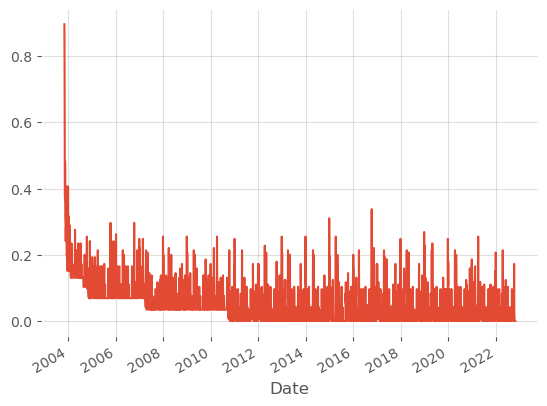

In [13]:
data = data_1.join(data_pool)
data.isna().mean(1).plot()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4782 entries, 2003-10-31 to 2022-10-28
Columns: 145 entries, RETURNS to LOG_^IXICDIFF4
dtypes: float64(145)
memory usage: 5.5 MB


## <font color='red'>Insights:With 144 features, We get it when you said we shall never eyeball correlation Prof</font>

### <font color='purple'> The Correlation Matrix looks like a 3D 8-bit Art! ;)</font>

<AxesSubplot:title={'center':'Correlation Matrix'}>

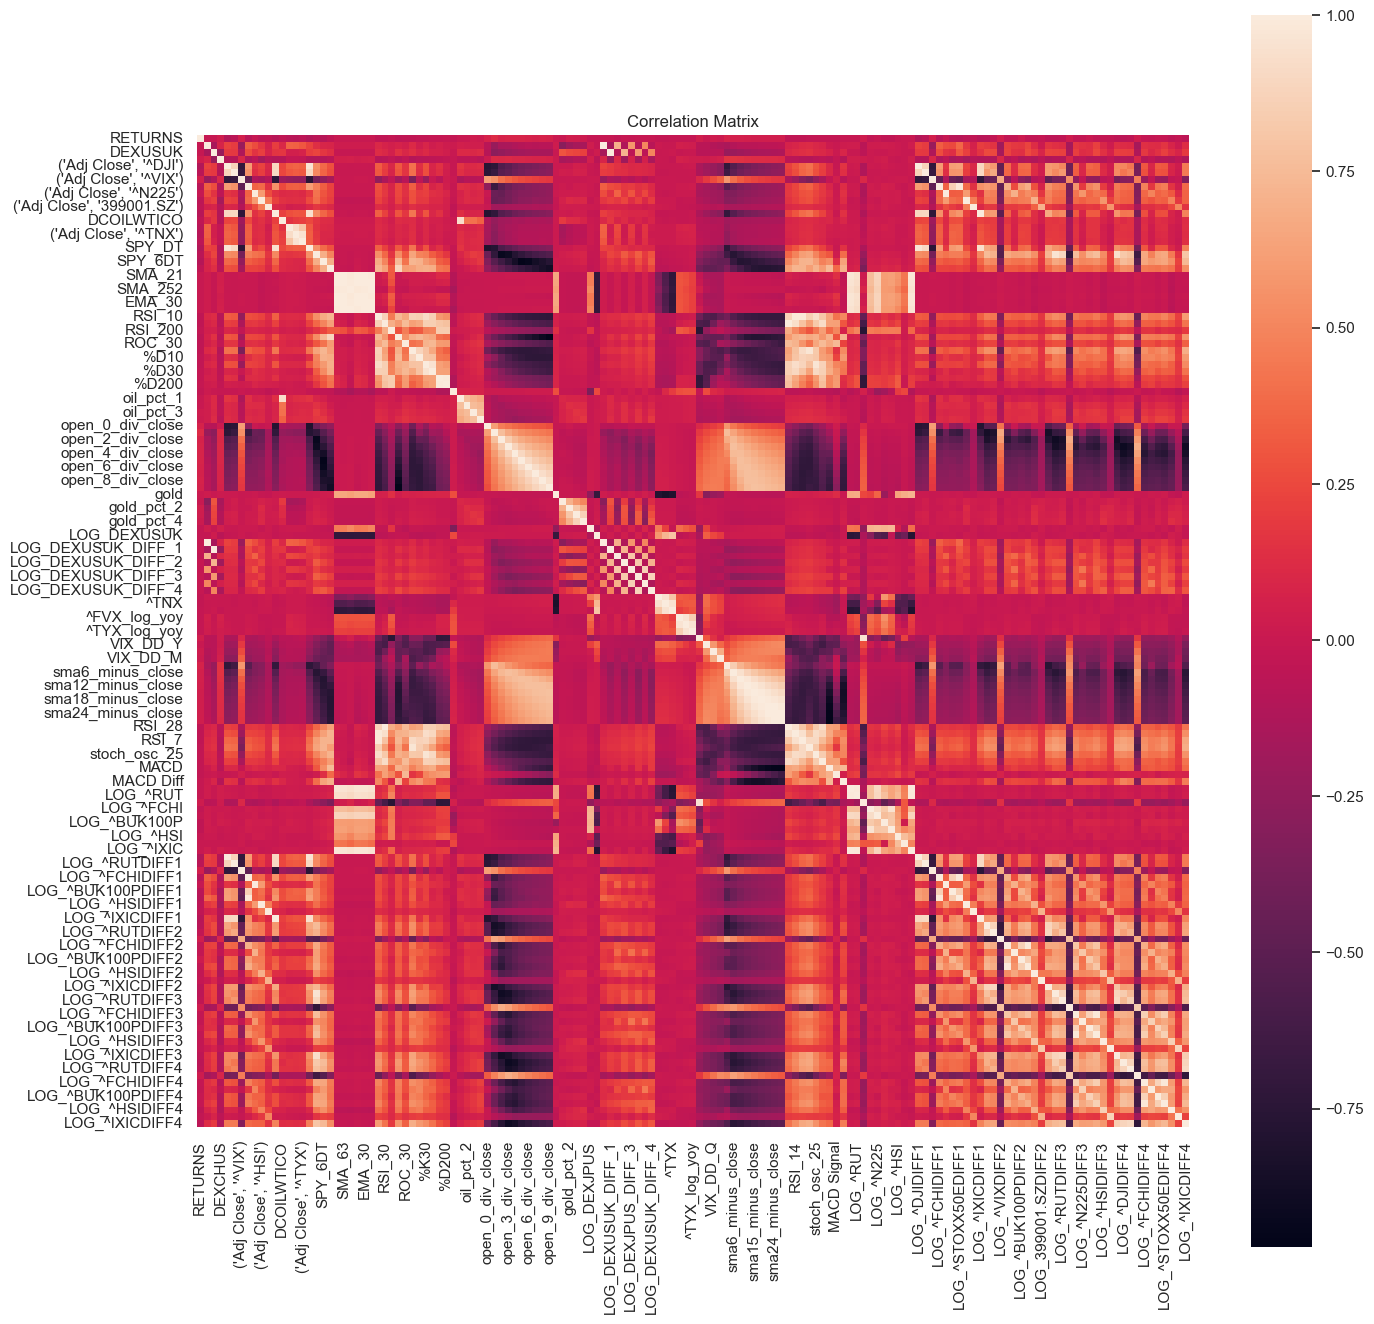

In [15]:
sns.set_theme(style = "white")

correlation = data.corr()

plt.figure(figsize = (16, 16)
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            annot = False,
            cmap = "rocket")

In [16]:
# data.loc[:,"DEXJPUS":"%D200"]=np.where(data.loc[:,"DEXJPUS":"%D200"]>0,1,0)
y_class = np.where(data["RETURNS"]>0,1,0)
data.columns = [str(i) for i in data.columns]

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.decomposition import PCA

#classification
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

#regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet

In [18]:
y_class = np.where(data["RETURNS"]>0,1,0)
y_reg = data["RETURNS"].values
X = data.iloc[:, 1:]

In [19]:
from sklearn.model_selection import GridSearchCV
# metrics
# reg
# r2,
# class
# roc_auc,

In [20]:
X.columns

Index(['DEXJPUS', 'DEXUSUK', 'DEXCHUS', '('Adj Close', '^DJI')',
       '('Adj Close', '^RUT')', '('Adj Close', '^VIX')',
       '('Adj Close', '^FCHI')', '('Adj Close', '^N225')',
       '('Adj Close', '^HSI')', '('Adj Close', '399001.SZ')',
       ...
       'LOG_^DJIDIFF4', 'LOG_^RUTDIFF4', 'LOG_^VIXDIFF4', 'LOG_^FCHIDIFF4',
       'LOG_^N225DIFF4', 'LOG_^BUK100PDIFF4', 'LOG_^STOXX50EDIFF4',
       'LOG_^HSIDIFF4', 'LOG_399001.SZDIFF4', 'LOG_^IXICDIFF4'],
      dtype='object', length=144)

In [21]:
X.std().sort_values()

DEXCHUS                 0.001764
DEXUSUK                 0.006067
LOG_DEXUSUK_DIFF_1      0.006067
DEXJPUS                 0.006124
LOG_DEXJPUS_DIFF_1      0.006124
                         ...    
SMA_63                 96.576851
EMA_30                 97.073747
SMA_21                 97.289105
EMA_10                 97.430323
gold                  437.196303
Length: 144, dtype: float64

In [22]:
X.max().sort_values()

VIX_DD_M       0.000000
VIX_DD_Q       0.000000
VIX_DD_Y       0.000000
DEXCHUS        0.018161
DEXJPUS        0.033428
               ...     
SMA_63       464.846984
EMA_30       468.253210
SMA_21       469.736192
EMA_10       473.993492
gold        2051.500000
Length: 144, dtype: float64

In [23]:
prep_pipeline = make_pipeline(
    KNNImputer(),
    PowerTransformer(),
    RobustScaler(),
    PCA(),
)

X_prepped = prep_pipeline.fit_transform(X)

In [24]:
X_prepped

array([[-9.557e-01, -3.063e-02, -1.228e+00, ..., -6.197e-16,  8.349e-16,
         1.521e-14],
       [-2.117e+00,  1.167e+00,  9.145e-02, ..., -3.940e-15,  7.768e-16,
        -1.521e-15],
       [-9.593e-01, -7.838e-01, -1.809e+00, ...,  3.539e-15, -1.095e-15,
        -2.554e-15],
       ...,
       [-1.340e+01, -7.233e+00, -1.052e+00, ..., -5.751e-16, -2.090e-16,
         2.056e-16],
       [-6.896e+00, -7.588e+00, -4.905e-01, ..., -1.188e-16, -1.882e-16,
         5.682e-17],
       [-1.713e+01, -7.348e+00,  1.022e+01, ...,  1.315e-16, -5.856e-17,
        -3.693e-17]])

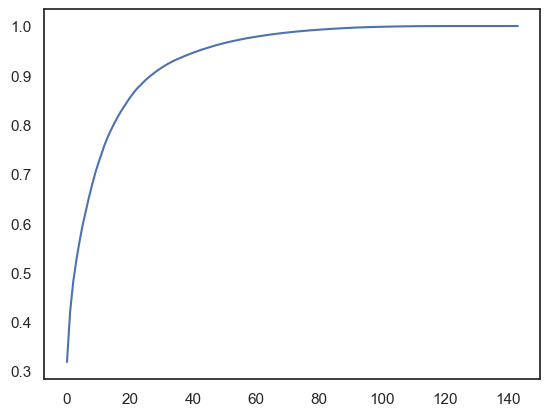

In [25]:
plt.plot(prep_pipeline[-1].explained_variance_[:].cumsum()/prep_pipeline[-1].explained_variance_.sum())

In [26]:
var_sum = pd.Series(prep_pipeline[-1].explained_variance_[:].cumsum()/prep_pipeline[-1].explained_variance_.sum())
var_sum[var_sum < 0.9].tail()

22    0.871581
23    0.878194
24    0.884620
25    0.890959
26    0.896362
dtype: float64

In [27]:
prep_pipeline[-1].components_.shape # n components, n feature

(144, 144)

In [28]:
prep_pipeline[-1].components_.sum(1)[:,np.newaxis].shape # n components, 1 total variance

(144, 1)

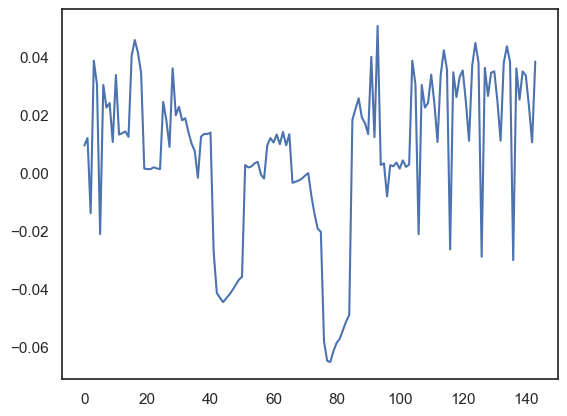

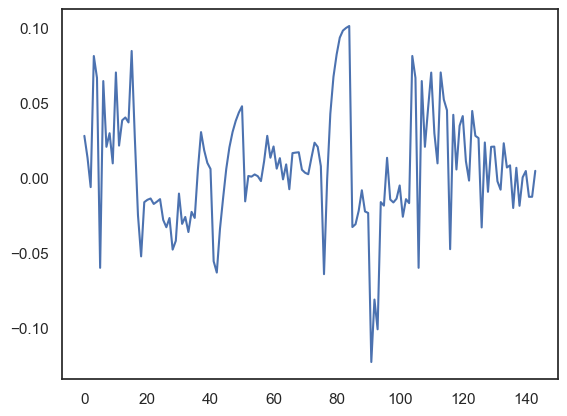

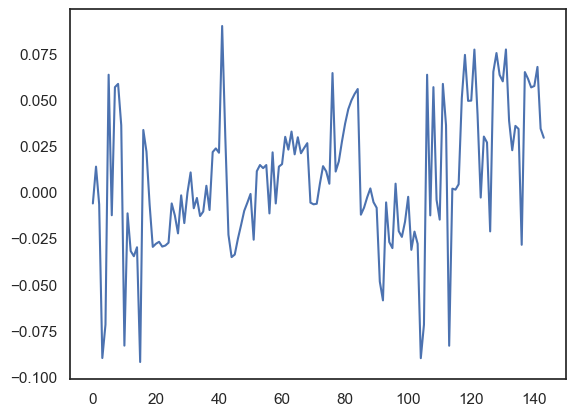

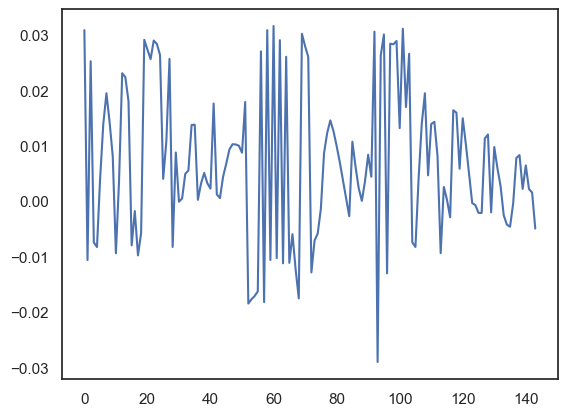

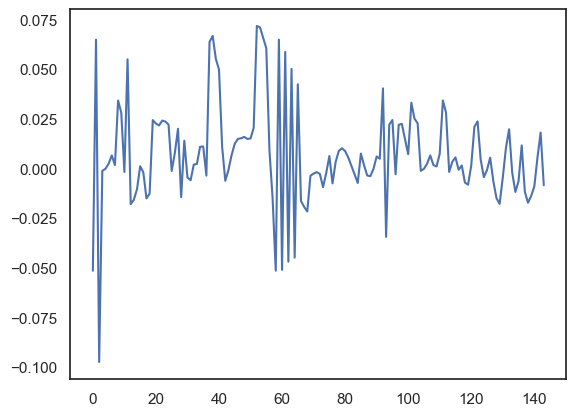

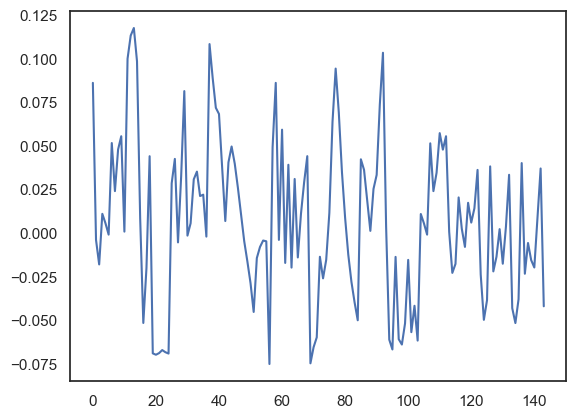

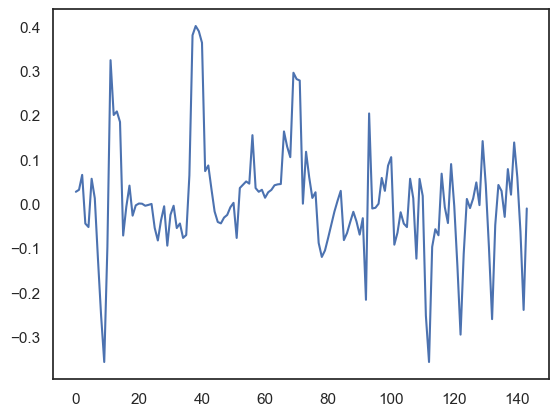

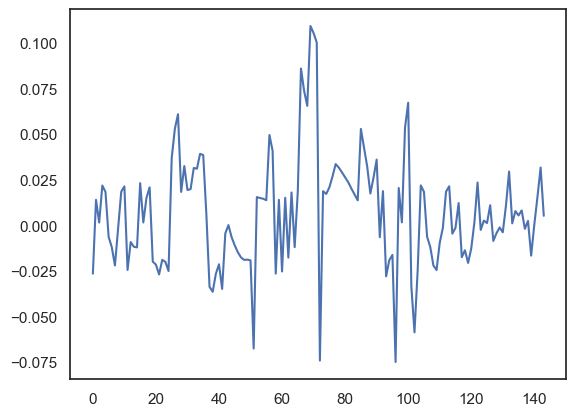

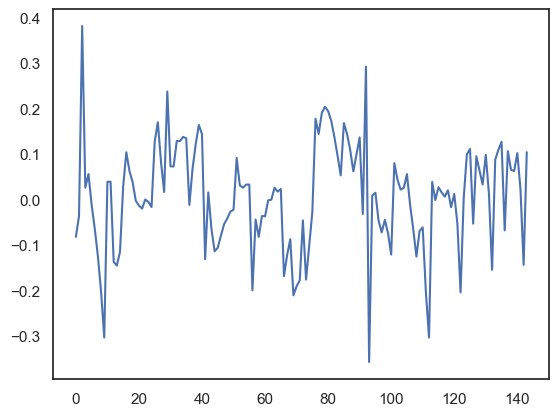

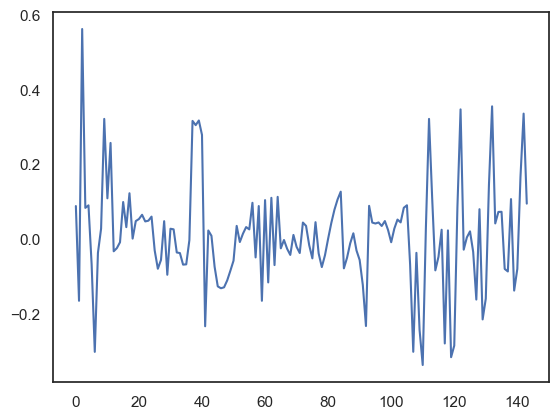

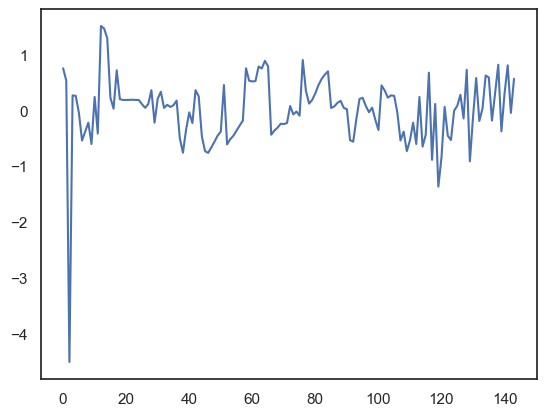

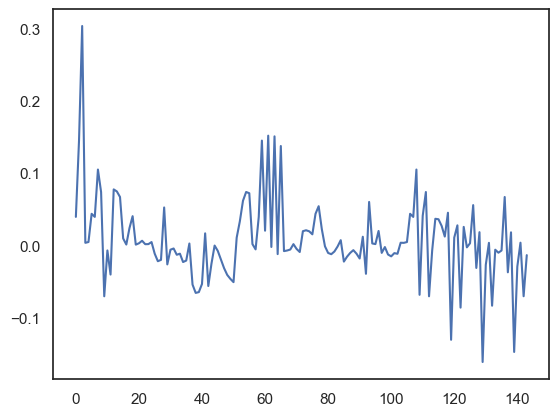

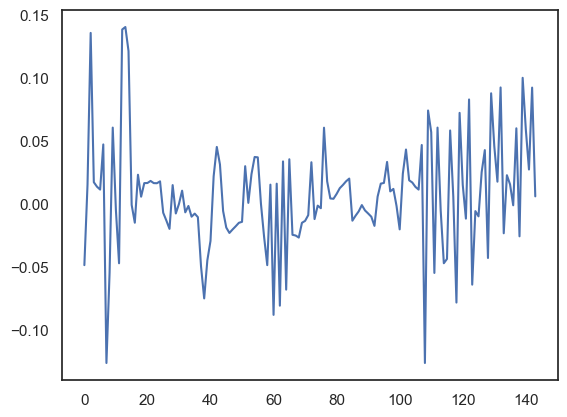

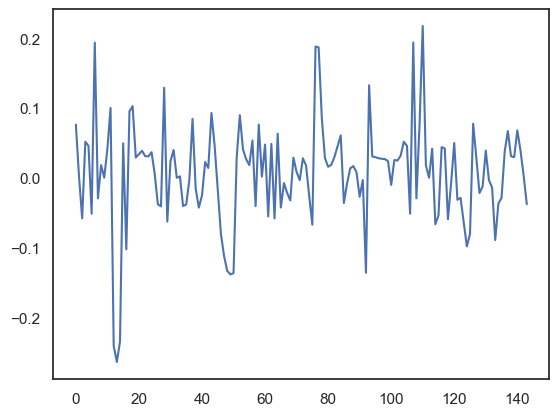

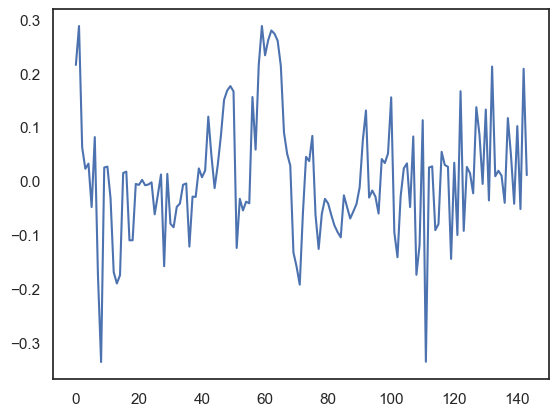

In [29]:
scaled_weights = (prep_pipeline[-1].components_ / prep_pipeline[-1].components_.sum(1)[:,np.newaxis])
# unscaled_weights = prep_pipeline[-2].inverse_transform(scaled_weights)
# unpowered_weights = prep_pipeline[-3].inverse_transform(unscaled_weights)
for w in scaled_weights[:15]:
    plt.plot(w)
    plt.show()

In [30]:
n = 10
for i in range(10):
    print(X.columns[np.argsort(abs(scaled_weights[i]))[::-1]][:n])

Index(['sma9_minus_close', 'sma6_minus_close', 'sma12_minus_close',
       'sma15_minus_close', 'sma3_minus_close', 'sma18_minus_close',
       'sma21_minus_close', 'sma24_minus_close', 'MACD Diff',
       'sma27_minus_close'],
      dtype='object')
Index(['MACD', 'sma27_minus_close', 'MACD Diff', 'sma24_minus_close',
       'sma21_minus_close', 'sma18_minus_close', 'SPY_DT', 'sma15_minus_close',
       'LOG_^DJIDIFF1', '('Adj Close', '^DJI')'],
      dtype='object')
Index(['SPY_DT', 'LOG_^DJIDIFF1', '('Adj Close', '^DJI')', 'open_0_div_close',
       'LOG_^IXICDIFF1', '('Adj Close', '^IXIC')', 'LOG_^HSIDIFF3',
       'LOG_^HSIDIFF2', 'LOG_^N225DIFF3', 'LOG_^N225DIFF2'],
      dtype='object')
Index(['LOG_DEXJPUS_DIFF_2', 'LOG_^HSI', 'DEXJPUS', 'LOG_DEXJPUS_DIFF_1',
       'MACD Signal', '^FVX_log_yoy', 'LOG_^RUT', 'SMA_21', 'MACD Diff',
       'LOG_DEXJPUS_DIFF_3'],
      dtype='object')
Index(['DEXCHUS', 'gold_pct_1', 'gold_pct_2', 'oil_pct_2', 'gold_pct_3',
       'LOG_DEXUSUK_DIFF_1

In [31]:
prep_pipeline = make_pipeline(
    KNNImputer(), #treat missing number as predicted, and plug known values as feature
    PowerTransformer(), 
    RobustScaler(), # divides with interquartile range to not be as susceptible to outliers
    PCA(26),
)

X_prepped = prep_pipeline.fit_transform(X)

In [32]:
X_prepped.shape #4782 rows, 26 columns

(4782, 26)

In [33]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [34]:
model = SVC(C=1, kernel='rbf')
model.fit(X_prepped, y_class)
model

SVC(C=1)

In [35]:
model = SVC()
param_grid = {
    'C': [1 * 2 ** -i for i in range(5)],
    'kernel': ['rbf', 'linear'], #rbf attempts to fit a circle (nonlinear) line
}
gscv = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
gscv.fit(X_prepped, y_class)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.25, 0.125, 0.0625],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc', verbose=3)

In [36]:
param_grid

{'C': [1, 0.5, 0.25, 0.125, 0.0625], 'kernel': ['rbf', 'linear']}

In [37]:
SVC(**{'C' : 1, 'kernel': 'rbf'})

SVC(C=1)

In [38]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [39]:
model = SVC()
param_grid = {
    'C': [1 * 2 ** -i for i in range(5)],
    'kernel': ['rbf', 'linear'],
}
gscv = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)
gscv.fit(X_prepped, y_class)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.25, 0.125, 0.0625],
                         'kernel': ['rbf', 'linear']},
             scoring='roc_auc', verbose=3)

In [40]:
pd.DataFrame(gscv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.494810,0.012690,0.174396,0.005078,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.493345,0.492900,0.498762,0.486780,0.491998,0.492757,0.003814,6
1,1.181095,0.097112,0.077248,0.001580,1,linear,"{'C': 1, 'kernel': 'linear'}",0.494466,0.507303,0.507936,0.534875,0.480971,0.505110,0.017859,1
2,0.504545,0.047811,0.179321,0.005423,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.495088,0.491660,0.497904,0.488615,0.487735,0.492201,0.003846,10
3,0.823280,0.044986,0.076376,0.002233,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.506116,0.505922,0.501017,0.510421,0.477850,0.500265,0.011597,3
4,0.496827,0.012805,0.174545,0.002500,0.25,rbf,"{'C': 0.25, 'kernel': 'rbf'}",0.495097,0.491805,0.497971,0.488514,0.487722,0.492222,0.003886,9
5,0.622751,0.025626,0.071796,0.001171,0.25,linear,"{'C': 0.25, 'kernel': 'linear'}",0.494669,0.500384,0.501419,0.494964,0.484574,0.495202,0.005980,5
6,0.496407,0.019590,0.178157,0.004869,0.125,rbf,"{'C': 0.125, 'kernel': 'rbf'}",0.495314,0.491699,0.498112,0.488677,0.487700,0.492300,0.003937,8
7,0.511920,0.019170,0.076680,0.002755,0.125,linear,"{'C': 0.125, 'kernel': 'linear'}",0.495380,0.512890,0.524410,0.482417,0.481877,0.499395,0.016847,4
8,0.499933,0.013845,0.142323,0.011404,0.0625,rbf,"{'C': 0.0625, 'kernel': 'rbf'}",0.495216,0.491589,0.498201,0.489102,0.487912,0.492404,0.003828,7
9,0.410262,0.061056,0.053742,0.006363,0.0625,linear,"{'C': 0.0625, 'kernel': 'linear'}",0.499841,0.507136,0.514864,0.489840,0.495101,0.501356,0.008831,2


In [41]:
diction = {
    'A' : 1,
    'B' : 2,
}

dictionary2 = {
    'A' : RandomForestClassifier,
    'B' : ExtraTreesClassifier
}

for key, value in diction.items():
    print(key)
    print(value)
    print(dictionary2[key])

A
1
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
B
2
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>


In [42]:
#classification
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

rand_seed = 627764 #627ROH

model_dict = {
    'GBC': GradientBoostingClassifier(n_estimators=50, random_state=rand_seed),
    'RFC': RandomForestClassifier(n_estimators=128, random_state=rand_seed),
    'ETC': ExtraTreesClassifier(n_estimators=128, random_state=rand_seed),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=rand_seed),
    'SVC': SVC(random_state=rand_seed)
}

param_grid_dict = {
    'GBC': {'min_samples_leaf': [0.1, 0.05, 0.02]},
    'RFC': {'min_samples_leaf': [0.1, 0.05, 0.02, 1]},
    'ETC': {'min_samples_leaf': [0.1, 0.05, 0.02, 1]},
    'KNN': {'n_neighbors': [1,2,3,5],
            'weights': ['uniform', 'distance']},
    'MLP': {'hidden_layer_sizes': [(10,10,5), (10,5)],
            'activation': ['relu', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01]},
    'SVC': {'C': [1 * 2 ** -i for i in range(5)],
            'kernel': ['rbf', 'linear']}, #rbf attempts to fit a circle (nonlinear) line
}

result_dict = {}
fitted_model_dict = {}

for model_name, model in model_dict.items():
    print('fitting ' + model_name)
    
    gscv = GridSearchCV(model, 
                        param_grid=param_grid_dict[model_name], 
                        cv=5, 
                        refit=True,
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=3)
    
    gscv.fit(X_prepped, y_class)
    
    fitted_model_dict[model_name] = gscv.best_estimator_
    result_dict[model_name] = gscv.cv_results_
    

fitting GBC
Fitting 5 folds for each of 3 candidates, totalling 15 fits
fitting RFC
Fitting 5 folds for each of 4 candidates, totalling 20 fits
fitting ETC
Fitting 5 folds for each of 4 candidates, totalling 20 fits
fitting KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
fitting MLP
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/grivoire/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/grivoire/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/grivoire/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/grivoire/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/grivoire/env/lib/python3.9/site-packages/skle

fitting SVC
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [43]:
pd.DataFrame(result_dict['GBC'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.212008,0.017268,0.002632,0.001902,0.1,{'min_samples_leaf': 0.1},0.506306,0.485808,0.478376,0.480003,0.471067,0.484312,0.011960,3
1,1.279723,0.039310,0.001835,0.000735,0.05,{'min_samples_leaf': 0.05},0.504567,0.511345,0.488279,0.487607,0.456742,0.489708,0.018879,1
2,1.262299,0.016687,0.001140,0.000050,0.02,{'min_samples_leaf': 0.02},0.500560,0.491408,0.490130,0.508104,0.444381,0.486917,0.022248,2


In [44]:
best_score_dict = {}
for k, v in result_dict.items():
    best_score_dict[k] = max(v['mean_test_score'])
pd.Series(best_score_dict)

#mention MLP wins in terms of accuracy but loses out to KNN & ETC on (over)fitted backtesting

GBC    0.489708
RFC    0.497767
ETC    0.501191
KNN    0.505216
MLP    0.507167
SVC    0.505110
dtype: float64

In [45]:
best_param_dict = {}
for k, v in result_dict.items():
    best_scorer = np.argsort(v['mean_test_score'])[-1]
    best_param_dict[k] = v['params'][best_scorer]
pd.Series(best_param_dict)['KNN']

{'n_neighbors': 1, 'weights': 'distance'}

In [46]:
fitted_model_dict

{'GBC': GradientBoostingClassifier(min_samples_leaf=0.05, n_estimators=50,
                            random_state=627764),
 'RFC': RandomForestClassifier(n_estimators=128, random_state=627764),
 'ETC': ExtraTreesClassifier(n_estimators=128, random_state=627764),
 'KNN': KNeighborsClassifier(n_neighbors=1),
 'MLP': MLPClassifier(alpha=0.001, hidden_layer_sizes=(10, 5), random_state=627764),
 'SVC': SVC(C=1, kernel='linear', random_state=627764)}

In [47]:
# accuracy_score(data["DIRECTION"], data["POSITION"]) 
# 0.7217391304347827

In [48]:
fitted_model_dict['MLP'].predict_proba(X_prepped)

array([[0.383, 0.617],
       [0.452, 0.548],
       [0.466, 0.534],
       ...,
       [0.804, 0.196],
       [0.359, 0.641],
       [0.282, 0.718]])

In [49]:
fitted_model_dict['KNN'].predict_proba(X_prepped)

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

0.6185696361355082


<AxesSubplot:xlabel='Date'>

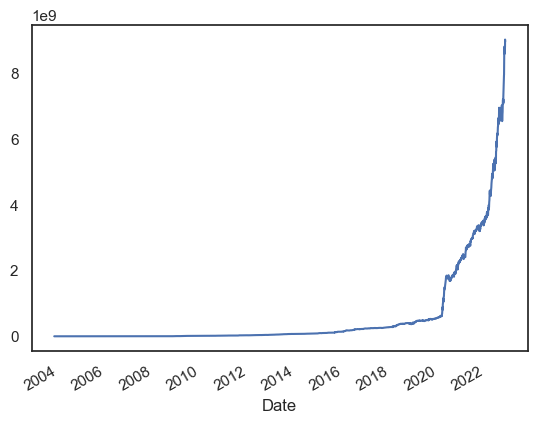

In [50]:
prediction = fitted_model_dict['MLP'].predict(X_prepped)
position = np.where(prediction==1, 1, -1)
print(accuracy_score(y_class, prediction))
strategy_return = position * data["RETURNS"]
strategy_tri = (strategy_return + 1).cumprod() * 500000
strategy_tri.plot()

In [51]:
prediction = fitted_model_dict['KNN'].predict(X_prepped)
position = np.where(prediction==1, 1, -1)
market_price = (data["RETURNS"] + 1).cumprod().shift(1).fillna(1)
long = pd.Series(prediction == 1, index=market_price.index)
short = pd.Series(prediction == 0, index=market_price.index)
unwind = None

execute_df = get_execution(market_price, long=long, short=short, unwind=None)
sim_df = simulate_execution(execute_df, starting_cap=500000, fee=0, buy_amount=0.99999)


In [73]:
sim_df

,Cash,Stock Unit,Net Exposure,Total Wealth
2003-10-31,5.000000e+00,4.999950e+05,4.999950e+05,5.000000e+05
2003-11-03,1.006546e+06,-4.999940e+05,-5.032702e+05,5.032762e+05
2003-11-04,5.383959e+00,5.021700e+05,5.043633e+05,5.043687e+05
2003-11-05,5.383959e+00,5.021700e+05,5.047452e+05,5.047506e+05
2003-11-06,1.014837e+06,-5.021700e+05,-5.074158e+05,5.074212e+05
...,...,...,...,...
2022-10-24,2.152172e+16,4.293763e+20,2.231425e+21,2.231447e+21
2022-10-25,4.534136e+21,-4.293761e+20,-2.267057e+21,2.267080e+21
2022-10-26,4.534136e+21,-4.293761e+20,-2.249977e+21,2.284160e+21
2022-10-27,2.296175e+16,4.405404e+20,2.296152e+21,2.296175e+21


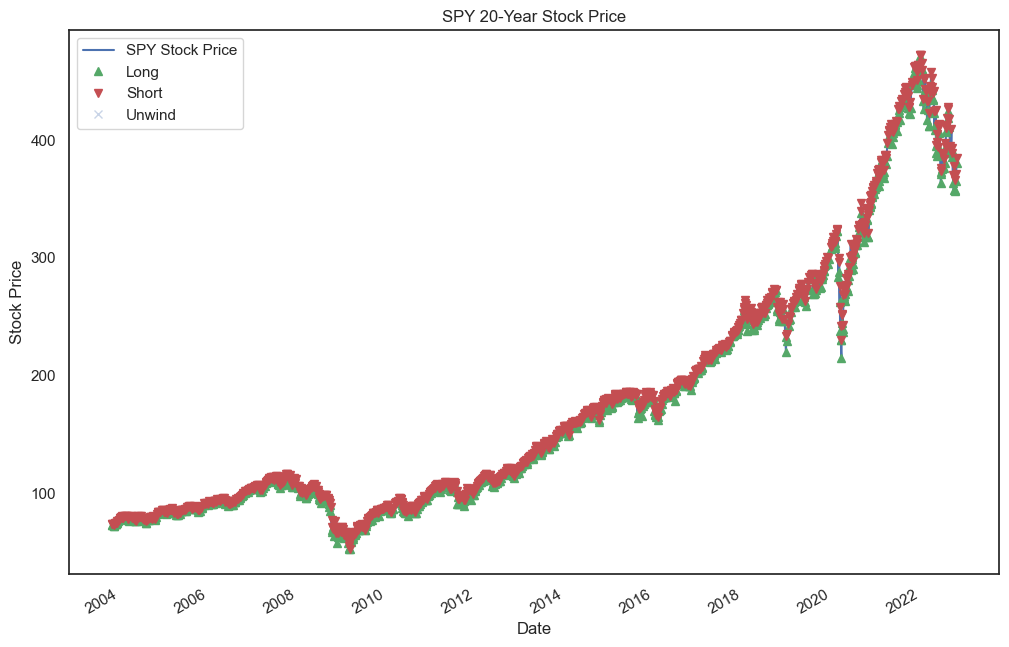

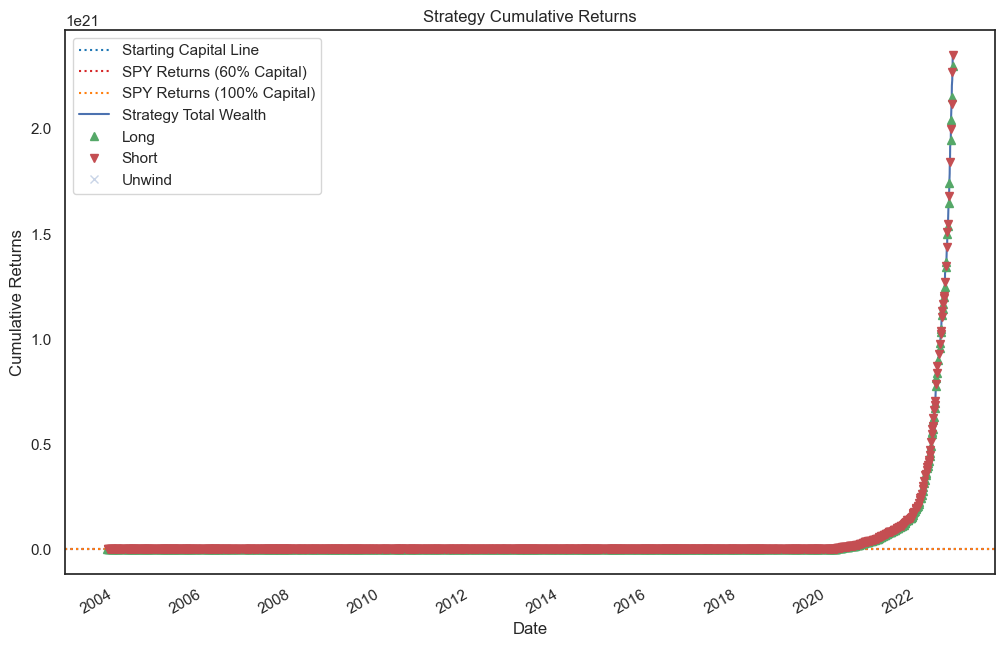

Total = 4.7016e+17%


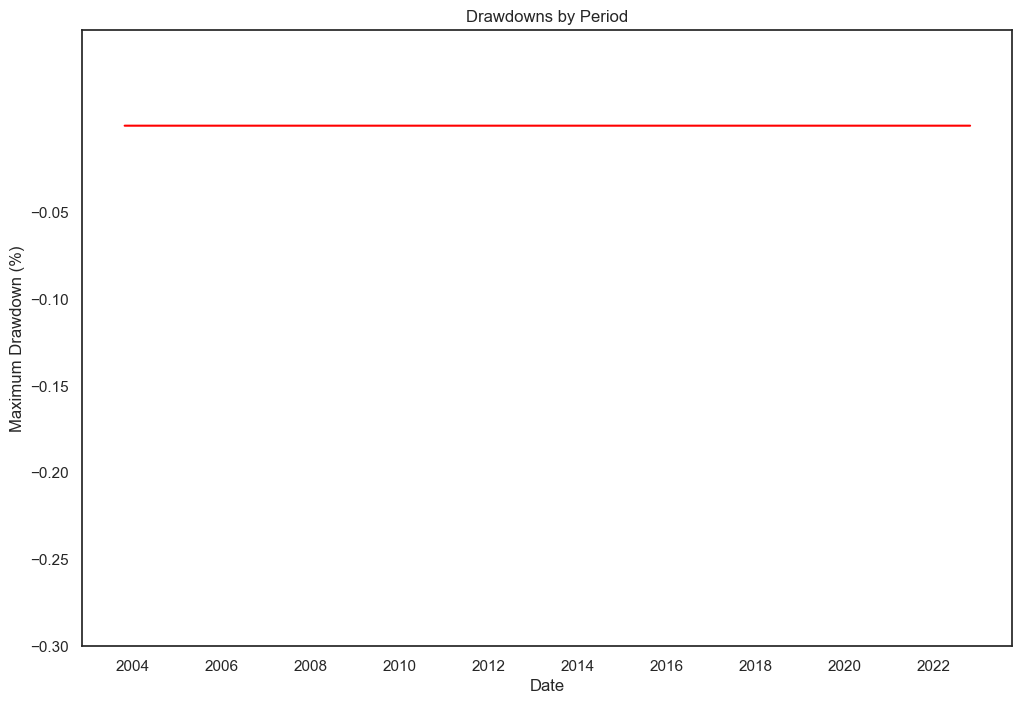

In [52]:
trade_execution(execute_df, starting_cap=500000, fee=0, buy_amount=0.99999,SPETF = SPETF[:-2])

In [53]:
#CAGR
(sim_df['Total Wealth'].iloc[-1] / sim_df['Total Wealth'].iloc[0]) ** (252/sim_df['Total Wealth'].shape[0])

6.697149611287463

In [54]:
analyze_tri(sim_df['Total Wealth'])

(Ann. Sharpe           13.234265
 2003                   0.231747
 2004                   2.950961
 2005                   2.605762
 2006                   2.163624
 2007                   4.963872
 2008                  59.972112
 2009                  17.957143
 2010                   6.004465
 2011                  11.549312
 2012                   3.275268
 2013                   2.771702
 2014                   2.660449
 2015                   4.858609
 2016                   3.186198
 2017                   1.128374
 2018                   5.127529
 2019                   3.130944
 2020                  24.871266
 2021                   3.730354
 2022                  11.008731
 mean annual return     8.707421
 dtype: float64,
                               Max Drawdown (%)
 Lmao  There's no drawdown and this overfits af)

<AxesSubplot:xlabel='Date'>

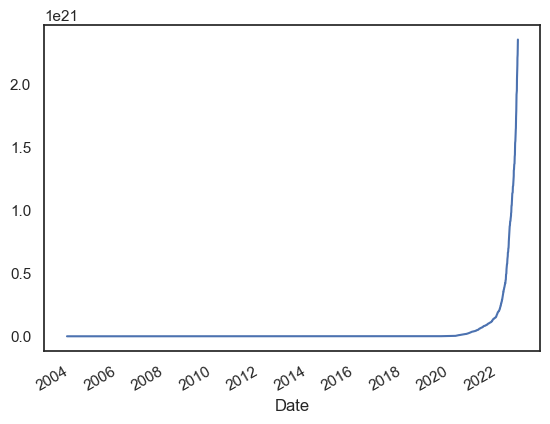

In [55]:
sim_df['Total Wealth'].plot()

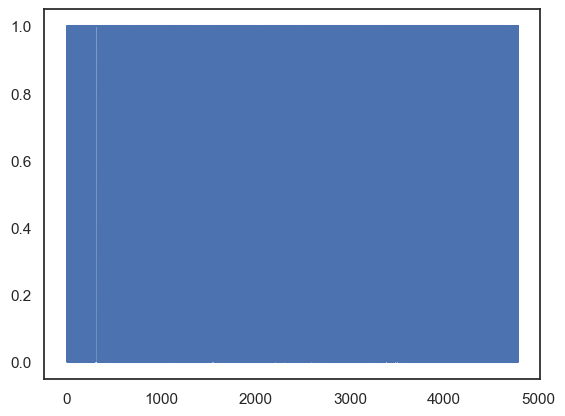

In [56]:
plt.plot(fitted_model_dict['MLP'].predict(X_prepped))

In [57]:
#regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet

rand_seed = 627764 #627ROH

model_reg_dict = {
    'GBR': GradientBoostingRegressor(n_estimators=50, random_state=rand_seed),
    'RFR': RandomForestRegressor(n_estimators=128, random_state=rand_seed),
    'ETR': ExtraTreesRegressor(n_estimators=128, random_state=rand_seed),
    'KNN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=rand_seed),
}

param_reg_grid_dict = {
    'GBR': {'min_samples_leaf': [0.1, 0.05, 0.02, 1]},
    'RFR': {'min_samples_leaf': [0.1, 0.05, 0.02, 1]},
    'ETR': {'min_samples_leaf': [0.1, 0.05, 0.02, 1]},
    'KNN': {'n_neighbors': [1,2,3,5],
            'weights': ['uniform', 'distance']},
    'MLP': {'hidden_layer_sizes': [(10,10,5), (10,5)],
            'activation': ['relu', 'logistic'],
            'alpha': [0.0001, 0.001, 0.01]}
}

result_reg_dict = {}
fitted_reg_model_dict = {}

for model_name, model in model_reg_dict.items():
    print('fitting ' + model_name)
    gscv = GridSearchCV(model, 
                        param_grid=param_reg_grid_dict[model_name], 
                        cv=5, 
                        scoring='r2', 
                        refit=True,
                        n_jobs=-1, 
                        verbose=3)
    gscv.fit(X_prepped, y_reg)
    fitted_reg_model_dict[model_name] = gscv.best_estimator_
    result_reg_dict[model_name] = gscv.cv_results_

fitting GBR
Fitting 5 folds for each of 4 candidates, totalling 20 fits
fitting RFR
Fitting 5 folds for each of 4 candidates, totalling 20 fits
fitting ETR
Fitting 5 folds for each of 4 candidates, totalling 20 fits
fitting KNN
Fitting 5 folds for each of 8 candidates, totalling 40 fits
fitting MLP
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [58]:
best_reg_score_dict = {}
for k, v in result_reg_dict.items():
    best_reg_score_dict[k] = max(v['mean_test_score'])
pd.Series(best_reg_score_dict) # yeesh

GBR   -0.018937
RFR   -0.002037
ETR   -0.000531
KNN   -0.131536
MLP   -0.003276
dtype: float64

In [59]:
best_reg_param_dict = {}
for k, v in result_reg_dict.items():
    best_scorer = np.argsort(v['mean_test_score'])[-1]
    best_reg_param_dict[k] = v['params'][best_scorer]
pd.Series(best_reg_param_dict)['ETR']

{'min_samples_leaf': 0.1}

0.9999999999999909


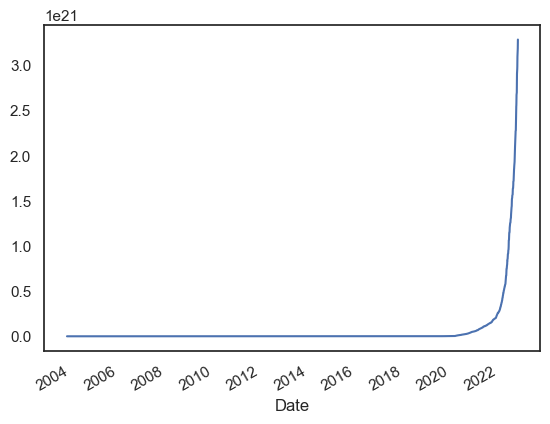

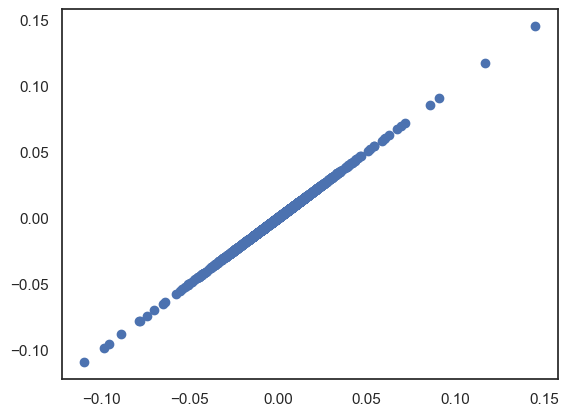

In [60]:
from sklearn.metrics import r2_score
prediction = fitted_reg_model_dict['KNN'].fit(X_prepped, y_reg).predict(X_prepped)
position = np.where(prediction > 0, 1, -1)
print(r2_score(y_reg, prediction))
strategy_return = position * data["RETURNS"]
strategy_tri = (strategy_return + 1).cumprod() * 500000
strategy_tri.plot()
plt.show()
plt.scatter(y_reg, prediction)

In [61]:
# models.append(("LR", LinearRegression()
#               )
#              )

# models.append(("LASSO", Lasso()
#               )
#              )
    
# models.append(("EN", ElasticNet()
#               )
#              )

# models.append(("CART", DecisionTreeRegressor()
#               )
#              )

# models.append(("KNN", KNeighborsRegressor()
#               )
#              )

# models.append(("SVR", SVR()
#               )
#              )

# # Bagging

# models.append(("ETR", ExtraTreesRegressor()
#               )
#              )

# models.append(("RFR", RandomForestRegressor()
#               )
#              )

# # Boosting

# models.append(("GBR", GradientBoostingRegressor()
#               )
#              )

# models.append(("ABR", AdaBoostRegressor()
#               )
#              )

# <a id='MRS'>Day-Traderoo Mean Reversion Strategy</a>

##### This strategy is based on the assumption that there is mean-reverting element in daily stock prices, and we wish utilize such phenomenon in a relatively fast fashion. It is not exactly an intraday strategy, but rather a short-term intraweek strategy capturing the daily differences between SPY's open and close stock prices:

$$
Open_{t-i} / Close_{t-1}
$$

##### We've generated the difference data on multiple lagged-open and close, and the winning formula appears to be lag 1 signals, which refers to the difference between open and close one day before actual strategy execution.

##### We defined a function in particular for open_close strategy, and made it tunable for the lag we wanna test and the threshold to unwind. In cases where the open and close prices are close enough to each other then we hold.

##### We do not do unwind or hold in these case to maximize our return. 

##### The reason on why we set buy amount to 0.9999 is that, if the input of buy amount is an integer, buy amount is the absolute number of stocks every time we trade. If the input is a float, buy amount is relative to the number of stocks  we are able to trade. Given that we are not sure how many aboslute amount of stocks to trade due to its volume of execution in this strategy (5000 - almost daily), to maximize the profit we set the buy amount to a float that is close to 1

##### Another important point is that this is a Long only strategy. This strategy helps us to avoid losing money after pandemic period because the market price was all the way up. Although long only strategy did lose some money in some crash periods such as 2008 and 2020.

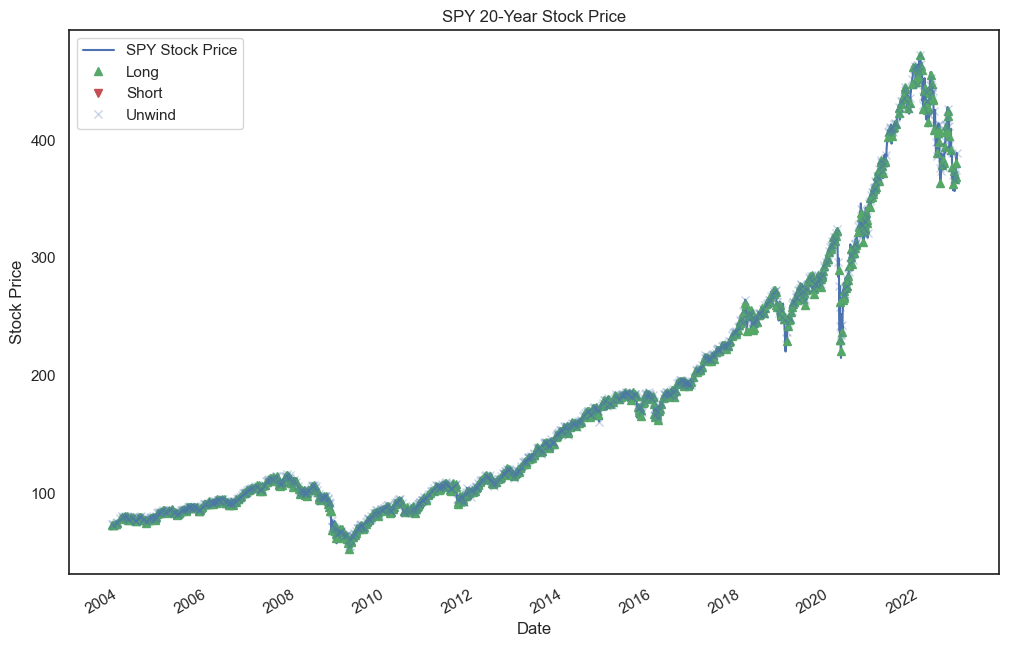

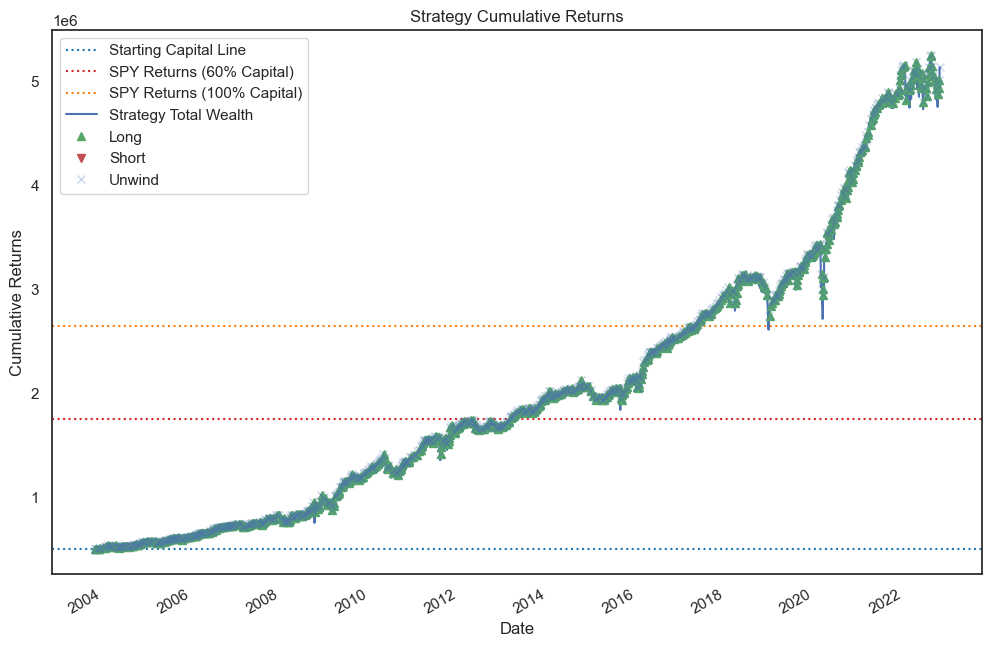

Total = 1027.5%


Ann. Sharpe    0.930058
dtype: float64


CAGR: 0.0882765659964222


           DD. Length (Days) DD. Length (Business Days)  Max Drawdown (%)
Date                                                                     
2020-02-21           48 days                    34 days        -20.892795
2008-10-03           50 days                    36 days        -20.873835
2018-06-15          340 days                   233 days        -17.131441


Wealth left in the account: 2022-10-31    5.137573e+06
Name: Total Wealth, dtype: float64


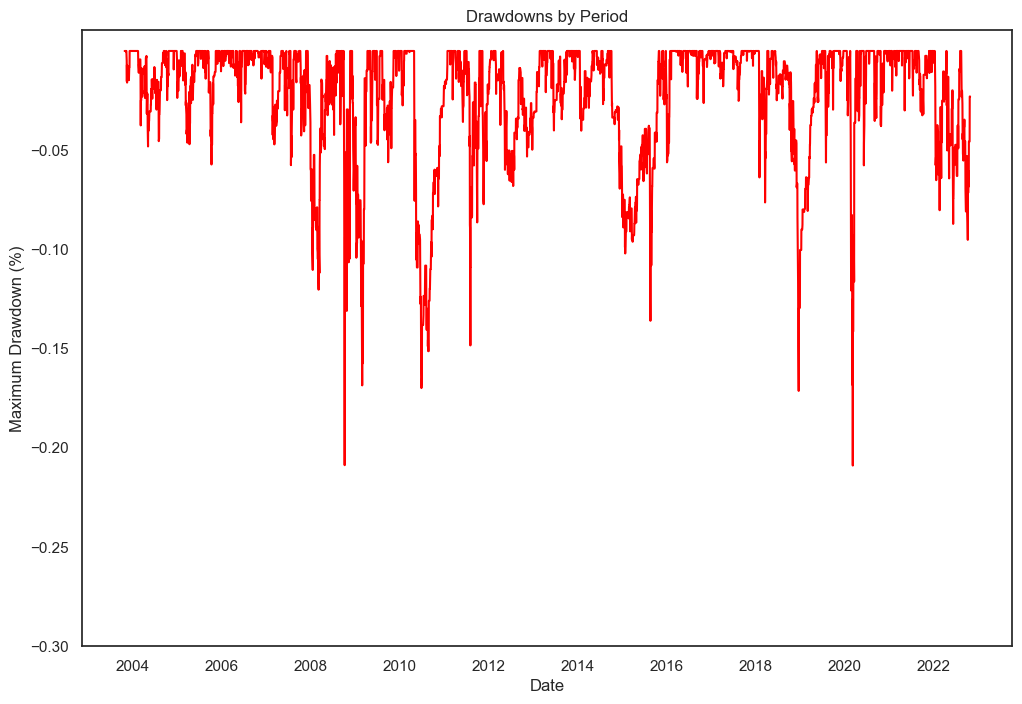

In [62]:
# Execution on lag 1 value(one day before execution, and no threshold for unwind to grap as many chances to long as possible)
Open_Close_MeanRe(1, 0, 0.9999)

# <a id ='MOM'>STORMAC Momentum Strategy</a>

#### In this Strategy, we seek to outperform the market by implementing a combination of Momentum Indicators. The idea is that we want to generate alpha while maintaining a high level of prudence in the signals generated by the strategy. 

#### We executed both Long and Short trades in this strategy:
#### For Long, we relied solely upon MACD's bullish cross to generate signals.
#### For Short, we utilized Stochastic %D14 indicator that crosses the middle line, MACD's bearish cross and RSI below 50.

#### We do not unwind in this strategy either, which means that we will close our trading position once signal reversal comes. 

### Conclusion
#### Observing the plotted cumulative returns, the profile of this strategy mimics the market itself, but we are able to achieve higher sharpe ratio & returns whilst having very few trades across the 20-year period. The maximum drawdown periods suggest that it is not robust to shocks (i.e. It was also caught in both 2008 & 2020 crashes). That said, overall we conclude that this is a strategy that would actually be replicated in real life scenarios, one that works with indices (or large-cap, blue chip stocks) and requires minimum active rebalancing efforts.

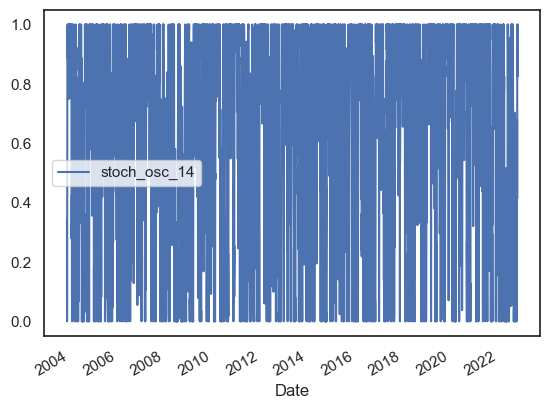

In [63]:
stoch = make_stoch(start = '2003-11-01', end = '2022-10-31', param_list = [14])
stoch_d = stoch.rolling(3).mean()
stoch.plot()

upper_s = 0.80
mid_s = 0.50
lower_s = 0.20
stoch_movement = np.sign(stoch_d.diff())
stoch_d_cross_upper = np.sign((stoch_d - upper_s) * (stoch_d - upper_s).shift(1)) == -1
stoch_d_cross_mid = np.sign((stoch_d - mid_s) * (stoch_d - mid_s).shift(1)) == -1
stoch_d_cross_lower = np.sign((stoch_d - lower_s) * (stoch_d - lower_s).shift(1)) == -1

macd = data_pool[['MACD','MACD Signal','MACD Diff']]
macd_cross = (np.sign(macd['MACD Diff'] * macd['MACD Diff'].shift(1)) == -1)
bullish_cross = (np.sign(macd['MACD'].diff()) == 1) & macd_cross 
bearish_cross = (np.sign(macd['MACD'].diff()) == -1) & macd_cross 

rsi = data_pool['RSI_28']
movement = np.sign(rsi.diff())
upper = 70
mid = 50
lower = 30
cross_upper = np.sign((rsi - upper) * (rsi - upper).shift(1)) == -1
cross_lower = np.sign((rsi - lower) * (rsi - lower).shift(1)) == -1
cross_mid = np.sign((rsi - mid) * (rsi - mid).shift(1)) == -1



In [64]:
long = bullish_cross

unwind = None
short = (rsi < 50) & bearish_cross & stoch_d_cross_mid['stoch_osc_14']
# short = bearish_cross & stoch_d_cross_mid
execution_df_rsi = get_execution(SPETF, long=long, short=short, unwind=unwind)


In [65]:
simulate_execution(execution_df_rsi, starting_cap=500000, fee=0, buy_amount=0.999)

,Cash,Stock Unit,Net Exposure,Total Wealth
2003-10-31,500000.000000,0.0,0.000000e+00,5.000000e+05
2003-11-03,500000.000000,0.0,0.000000e+00,5.000000e+05
2003-11-04,500000.000000,0.0,0.000000e+00,5.000000e+05
2003-11-05,500000.000000,0.0,0.000000e+00,5.000000e+05
2003-11-06,500000.000000,0.0,0.000000e+00,5.000000e+05
...,...,...,...,...
2022-10-25,3703.201004,8415.0,3.239102e+06,3.242805e+06
2022-10-26,3703.201004,8415.0,3.214698e+06,3.218401e+06
2022-10-27,3703.201004,8415.0,3.197532e+06,3.201235e+06
2022-10-28,3703.201004,8415.0,3.273603e+06,3.277306e+06


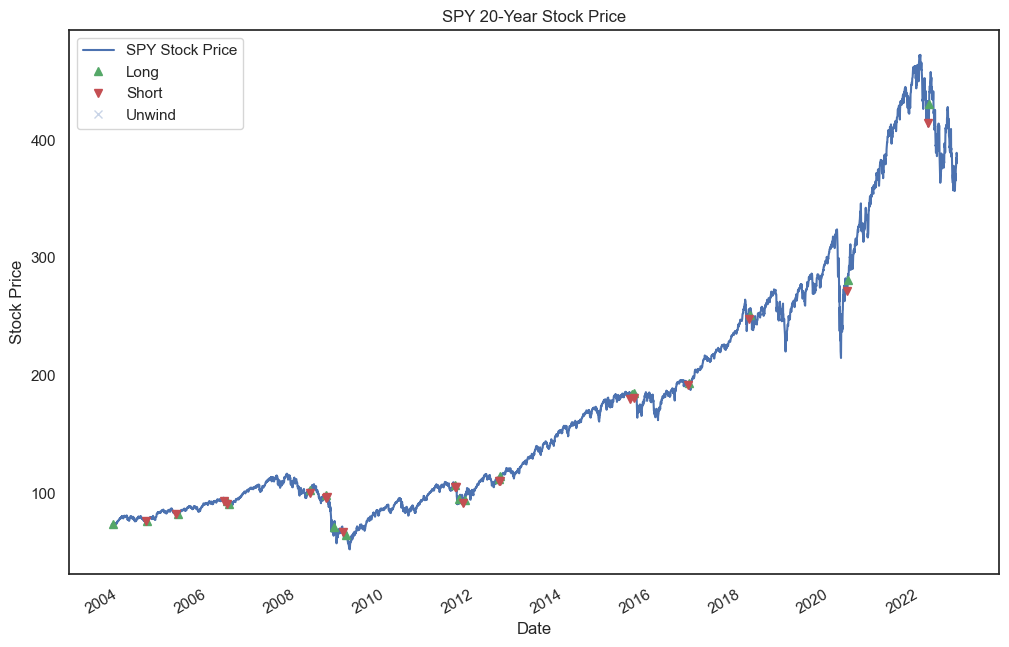

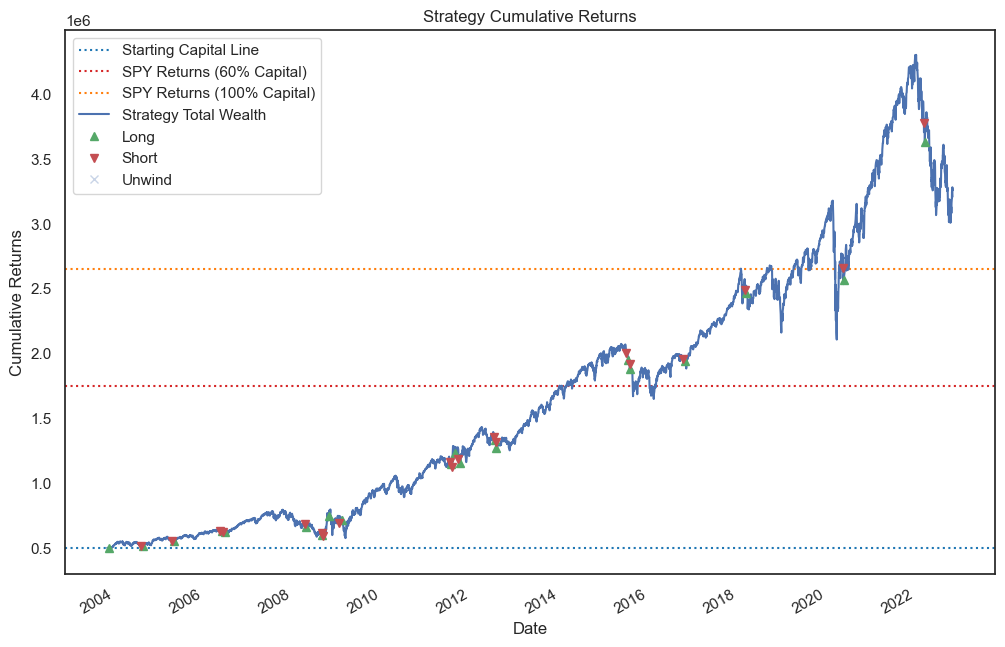

Total = 651.61%


(Ann. Sharpe           0.630163
 2003                  0.051490
 2004                  0.097084
 2005                  0.053600
 2006                  0.152863
 2007                  0.053316
 2008                 -0.023908
 2009                  0.295535
 2010                  0.131358
 2011                  0.126418
 2012                  0.033340
 2013                  0.289986
 2014                  0.145606
 2015                 -0.074470
 2016                  0.120400
 2017                  0.207783
 2018                 -0.074111
 2019                  0.310814
 2020                  0.089055
 2021                  0.305007
 2022                 -0.242942
 mean annual return    0.102411
 dtype: float64,
            DD. Length (Days) DD. Length (Business Days)  Max Drawdown (%)
 Date                                                                     
 2020-02-20          268 days                   188 days        -33.712460
 2022-01-04          301 days                   208 da

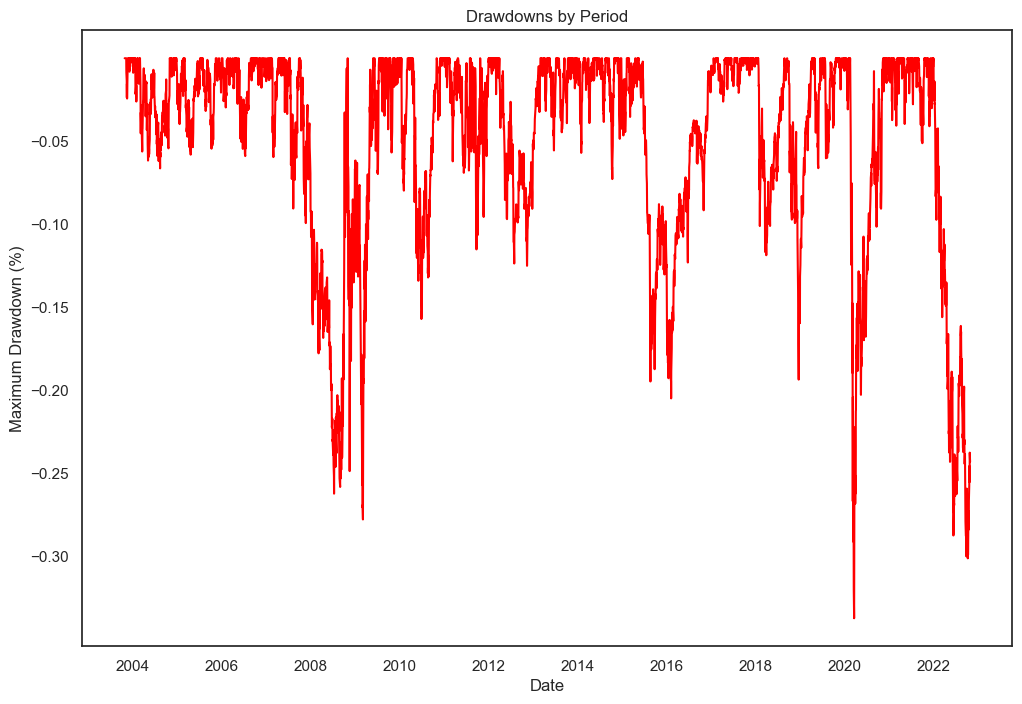

In [67]:
trade_execution(execution_df_rsi, starting_cap=500000, fee=0, buy_amount=0.9999, SPETF = SPETF)
result = simulate_execution(execution_df_rsi, starting_cap=500000, fee=0, buy_amount=0.9999)
analyze_tri(result['Total Wealth'])

In [68]:
lists = ['Annualized Sharpe','CAGR(%)','Maximum Drawdown(Calendar Days)','Maximum Drawdown(%)',\
         'Total Wealth','Strategy Cumulative Returns(%)']

In [69]:
strategy = ['Ultrafittus Maximus','Day-Traderoo','STORMAC']

In [70]:
df = pd.DataFrame(np.random.randn(3, 6),index = strategy, columns=lists)

In [76]:
df.loc['Ultrafittus Maximus']['Annualized Sharpe'] = 13.234265
df.loc['Day-Traderoo']['Annualized Sharpe'] = 0.930058
df.loc['STORMAC']['Annualized Sharpe'] = 0.630163

df.loc['Ultrafittus Maximus']['CAGR(%)'] = 6.697149611287463
df.loc['Day-Traderoo']['CAGR(%)'] = 0.0882765659964222
df.loc['STORMAC']['CAGR(%)'] = 1.1037897510391226

df.loc['Ultrafittus Maximus']['Maximum Drawdown(Calendar Days)'] = 0
df.loc['Day-Traderoo']['Maximum Drawdown(Calendar Days)'] = 48
df.loc['STORMAC']['Maximum Drawdown(Calendar Days)'] = 268

df.loc['Ultrafittus Maximus']['Maximum Drawdown(%)'] = 0
df.loc['Day-Traderoo']['Maximum Drawdown(%)'] = -20.892795
df.loc['STORMAC']['Maximum Drawdown(%)'] = -33.712460

df.loc['Ultrafittus Maximus']['Total Wealth'] = 2.350802e+21
df.loc['Day-Traderoo']['Total Wealth'] = 5.137573e+06
df.loc['STORMAC']['Total Wealth'] = 3.253660e+06

df.loc['Ultrafittus Maximus']['Strategy Cumulative Returns(%)'] = 4.7016e+17
df.loc['Day-Traderoo']['Strategy Cumulative Returns(%)'] = 1027.5
df.loc['STORMAC']['Strategy Cumulative Returns(%)'] = 651.61


In [77]:
df

,Annualized Sharpe,CAGR(%),Maximum Drawdown(Calendar Days),Maximum Drawdown(%),Total Wealth,Strategy Cumulative Returns(%)
Ultrafittus Maximus,13.234265,6.697150,0.0,0.000000,2.350802e+21,4.701600e+17
Day-Traderoo,0.930058,0.088277,48.0,-20.892795,5.137573e+06,1.027500e+03
STORMAC,0.630163,1.103790,268.0,-33.712460,3.253660e+06,6.516100e+02
